# Example showing the Kernel trick
This example shows how the Kernel trick can be used to introduce a new dimension, in which a hyper-surface can separate the data.

Import required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm

Define constants.

In [2]:
SIZE = 10
FILENAME = "data/circles.csv"
PLOT1 = "circles_2D"
PLOT2 = "circles_3D"
PLOT3 = "circles_SVM"

Import data

In [3]:
df = pd.read_csv(FILENAME)
df.head()

,x,y,Class
0,3.925084,-3.745313,1
1,-0.255449,-0.238221,-1
2,-3.669504,3.606631,1
3,-0.407401,0.980058,-1
4,5.033866,0.322856,1


Define a new feature map:

In [4]:
def phi(x,y):
    """Function module to calculate kernel function.
        
    Parameter
    ---------
    x: array
        First input
    y: array
        Second input
    
    Returns
    -------
    z: array
        Kernel function
        
    Notes
    -----
    The function module works with Numpy arrays, single variables.
    """
    z = .5*(x*x + y*y)
    return(z)

Split the data into test and training data:

In [5]:
X = df[['x','y']]
Y = df['Class']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5, shuffle = False)

Prepare training data  for graphing.

In [6]:
x = np.array(x_train['x'])
y = np.array(x_train['y'])
z = phi(x,y)
col = np.where(y_train == 1, 'r', 'b')

Display two dimensional graph of training data.

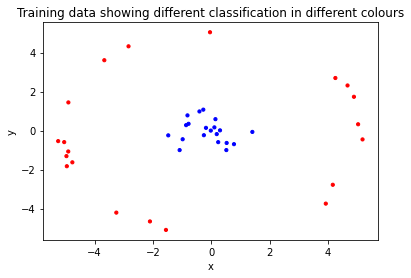

In [7]:
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Training data showing different classification in different colours')
ax.scatter(x, y, s=SIZE, c = col )
fig.savefig(PLOT1)

Display three dimensional graph of training data, with the new feature added.

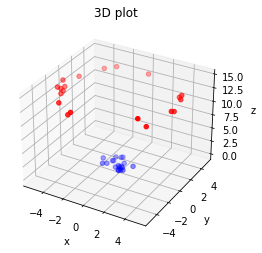

In [8]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(projection='3d')
ax.set_title('Training data after feature map')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('3D plot')
ax2.scatter(x, y, z, c = col )
fig2.savefig(PLOT2)

Define a helper function to calculate the dot product after the feature map:

In [9]:
def phi_dist(x1,x2):
    """Calculate dot product between two vectors
        
    Parameter
    ---------
    x1: array
        First vector
    x2: array
        Second vector
    
    Returns
    -------
    dot : real
        Dot product of two vectors after a feature map
        
    Notes
    -----
    The input is a two dimensional vector.  This is augmented with a third dimension using the feature 
    map, and a cross product of the new three dimensional vector is returned.
    """
    x1_2 = phi(x1[0], x1[1])
    x2_2 = phi(x2[0], x2[1])
    dot=np.dot([x1[0], x1[1],  x1_2], [x2[0], x2[1], x2_2])
    return(dot)

Define a kernel function by calculating the gram_matrix:

In [10]:
def my_kernel(X,Y):
    """Calculate the gram matrix based on two arrays
        
    Parameter
    ---------
    X: array
        First input array
    Y: array
        Second input array
    
    Returns
    -------
    gram_matrix : array
        Gram matrix
        
    Notes
    -----
    The input arrays contains two dimensions.  This is augmented with a third dimension using the feature 
    map, and the Gram matrix is constructed as the cross product of the new three dimensional vector is returned.
    """

    gram_matrix = np.zeros((X.shape[0], Y.shape[0]))
    for i, x1 in enumerate(X.values):
        for j, x2 in enumerate(Y.values):
            gram_matrix[i, j] = phi_dist(x1, x2)
        
    return gram_matrix    

Enable a SciKit Learn support vector classifier using the kernel function defined above.

In [11]:
clf = svm.SVC(kernel=my_kernel)
clf.fit(x_train, y_train)

SVC(kernel=<function my_kernel at 0x000002452163D790>)

Use the support vector classifier to make a prediction:

In [12]:
y_pred = clf.predict(x_test)
pred_colour= np.where(y_pred==1, 'r', 'b')
train_colour= np.where(y_train==1, 'r', 'b')

Plot out the separating hyperplane and the predicted results:

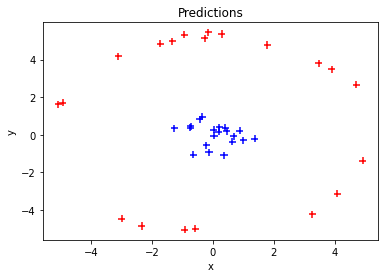

In [13]:
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predictions')
plt.scatter(x_test['x'], x_test['y'], s=50, c=pred_colour, marker = '+')
plt.savefig(PLOT3)
plt.show()